## Works in Colab

This cell works in Colab and compiles the animation after generating all the frames, so it will be slower for longer animations.

In [15]:
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 20
board = np.random.choice(2, (N, N), p=[0.8, 0.2])
cmap = colors.ListedColormap(['darkgreen', 'yellow'])

neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]


def update(data):
    global board
    new_board = board.copy()
    for row in range(N):
        for col in range(N):
            count = 0
            new_neighbors = list(zip(np.array(neighbors)[:, 0] + row, np.array(neighbors)[:, 1] + col))
            for i in range(8):
                r, c = new_neighbors[i]
                if not any(i in [r, c] for i in [-1, N]):
                    if board[r][c] > 0: count += 1
                    if count == 4: break
            if board[row][col] > 0:
                if count in [2, 3]:
                    # Any live cell with two or three live neighbors lives on to the next generation.
                    new_board[row][col] += 1 if new_board[row][col] < 1 else 0
                else:
                    # Any live cell with fewer than two live neighbors dies, as if by under population.
                    # Any live cell with more than three live neighbors dies, as if by overpopulation.
                    new_board[row][col] -= 1 if new_board[row][col] > 0 else 0
            elif count == 3:
                # Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.
                new_board[row][col] = 1
    board = new_board
    mat.set_data(new_board)
    return [mat]


# set up animation
fig, ax = plt.subplots()
ax.grid(False)
plt.axis('off')
mat = ax.matshow(board, cmap=cmap)
ani = animation.FuncAnimation(fig, update, frames = 100, interval=120, save_count=0, blit=True)
plt.close()

rc('animation', html='jshtml')
ani

## Works in Jupyter

This cell works in Jupyter and will autoredraw frames in real time, so it can run forever, but the redraw rate can't be sped up.

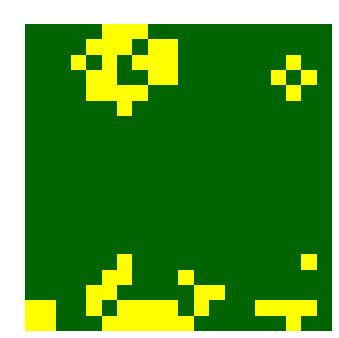

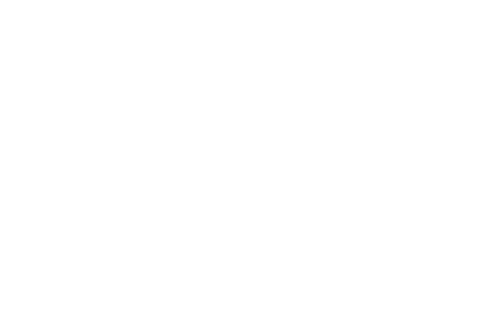

In [25]:
import numpy as np
from IPython import display
from matplotlib import colors
import matplotlib.pyplot as plt

N = 20
board = np.random.choice(2, (N, N), p=[0.8, 0.2])
cmap = colors.ListedColormap(['darkgreen', 'yellow'])

neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

for i in range(1000):
    new_board = board.copy()
    for row in range(N):
        for col in range(N):
            count = 0
            new_neighbors = list(zip(np.array(neighbors)[:, 0] + row, np.array(neighbors)[:, 1] + col))
            for i in range(8):
                r, c = new_neighbors[i]
                if not any(i in [r, c] for i in [-1, N]):
                    if board[r][c] > 0: count += 1
                    if count == 4: break
            if board[row][col] > 0:
                if count in [2, 3]:
                    # Any live cell with two or three live neighbors lives on to the next generation.
                    new_board[row][col] += 1 if new_board[row][col] < 1 else 0
                else:
                    # Any live cell with fewer than two live neighbors dies, as if by under population.
                    # Any live cell with more than three live neighbors dies, as if by overpopulation.
                    new_board[row][col] -= 1 if new_board[row][col] > 0 else 0
            elif count == 3:
                # Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.
                new_board[row][col] = 1
    board = new_board
    
    plt.matshow(board, cmap=cmap)
    display.clear_output(wait=True)
    plt.grid(False)
    plt.axis('off')
    
    display.display(plt.gcf())
    
    plt.close()